# CANH TRAN Notebook - Project 06.

- Author: [Ken McTran](https://github.com/ctranimal )
- Repository: https://github.com/ctranimal/datafun-06-eda 
  
- Purpose: To practice with Markdown cells, Jupyter, pandas, Seaborn and other popular tools for data analytics. I utilized Quarto as a tool to convert Jupyter notebook into more readable/presentable products.
- Date: Most recently updated: 8/07/25.

## Section 0. Setting-Up: Import external packages 
   
#### The purpose of this section is to import external packages that I will need to execute python code subsequently

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Section 1. Step-1: Data Acquisition

#### 1. Load the car_crashes dataset into pandas DataFrame. For this project, we use pre-made data called car_crashes so that we can go ahead and practice with pandas DataFrame (as opposed to loading data from the internet via reading excel or csv or JSON data etc ...)

In [25]:
# Load the dataset ino a pandas DataFrame
df = sns.load_dataset("car_crashes")

# Inspect first rows of the DataFrame
print(df.head())

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


#### 2. Observations: The table had 50 rows, 1 for each state. Each row has info for crashes: total crashes per billions of miles driven, speeding related crashes, alcohol related crashes, number of crashes with no previous accidents, number of not-distracted crashes and info on insurance premiums and insurance losses.

## Section 2. Step-2: Initial Data Inspection

#### Display the first 10 rows of the DataFrame, display the data types of each column using df.head(10), df.shape and df.dtypes

In [26]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   
5   13.6     5.032    3.808          10.744       12.920       835.50   
6   10.8     4.968    3.888           9.396        8.856      1068.73   
7   16.2     6.156    4.860          14.094       16.038      1137.87   
8    5.9     2.006    1.593           5.900        5.900      1273.89   
9   17.9     3.759    5.191          16.468       16.826      1160.13   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  
5      139.91     CO  
6      167.02     CT  
7      151.4

#### Observations: Each row has info for crashes: total crashes per billions of miles driven, speeding related crashes, alcohol related crashes, number of crashes with no previous accidents, number of not-distracted crashes and info on insurance premiums and insurance losses.

## Section 3. Step-3: Initial Descriptive Statistics

#### Use the DataFrame describe() method to display summary statistics for each column

In [27]:
print(df.describe())

           total   speeding    alcohol  not_distracted  no_previous  \
count  51.000000  51.000000  51.000000       51.000000    51.000000   
mean   15.790196   4.998196   4.886784       13.573176    14.004882   
std     4.122002   2.017747   1.729133        4.508977     3.764672   
min     5.900000   1.792000   1.593000        1.760000     5.900000   
25%    12.750000   3.766500   3.894000       10.478000    11.348000   
50%    15.600000   4.608000   4.554000       13.857000    13.775000   
75%    18.500000   6.439000   5.604000       16.140000    16.755000   
max    23.900000   9.450000  10.038000       23.661000    21.280000   

       ins_premium  ins_losses  
count    51.000000   51.000000  
mean    886.957647  134.493137  
std     178.296285   24.835922  
min     641.960000   82.750000  
25%     768.430000  114.645000  
50%     858.970000  136.050000  
75%    1007.945000  151.870000  
max    1301.520000  194.780000  


#### Observations: 
  * The information displayed above had descriptive statistics for each of the columns: the mean, standard deviations, min/max, 25 percentile, 50 percentile, and 75 percentile.
  * Look at standard deviation for insurance premium and insurance losses. The std for ins_losses is about 25 whereas std for ins_premium is 178. Thus, std for ins_premium is about 7 times larger than that for ins_losses. 
  * If I start an insurance company, I would open office at states where the std for ins_premium is the largest, because then I would make the most profit.

## Section 4. Step-4: Initial Data Distribution for Numerical Columns

#### Use df['ins_premium'].hist() to plot a histogram for 'ins_premium' column. 

<Axes: >

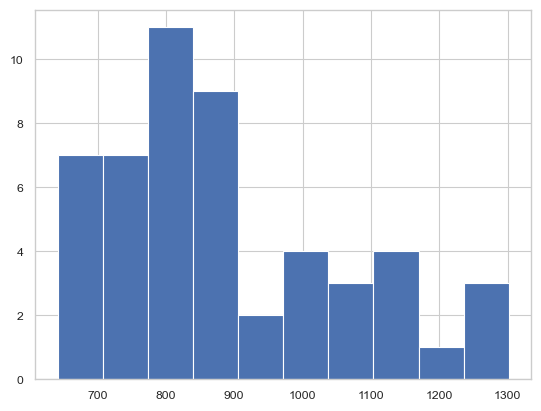

In [28]:
df['ins_premium'].hist()

#### Observations: The insuraance premium are concentrated around $800 amount, with longer "tail" towards $1,300.
#### Below, show all the histograms for all numerical columns, using df.hist()

array([[<Axes: title={'center': 'total'}>,
        <Axes: title={'center': 'speeding'}>,
        <Axes: title={'center': 'alcohol'}>],
       [<Axes: title={'center': 'not_distracted'}>,
        <Axes: title={'center': 'no_previous'}>,
        <Axes: title={'center': 'ins_premium'}>],
       [<Axes: title={'center': 'ins_losses'}>, <Axes: >, <Axes: >]],
      dtype=object)

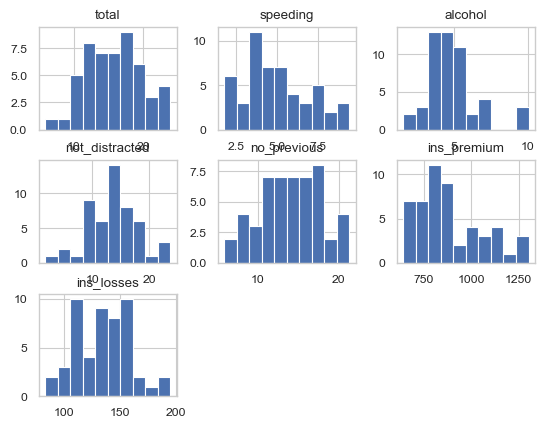

In [29]:
df.hist()

## Section 5. Step-5: Initial Data Distribution for 'ins_premium' Columns

#### Using bins as input for df.value_counts(), dividing up the values of 'ins_premium' into 100s and count how many in each range.

In [30]:
bins = range(500, 1500, 100) # creates bins like [500, 599), [600-699), ..., [1300-1399)

counts_by_100s_value_counts = df['ins_premium'].value_counts(bins=10).sort_index()
print(counts_by_100s_value_counts)

(641.299, 707.916]       7
(707.916, 773.872]       7
(773.872, 839.828]      11
(839.828, 905.784]       9
(905.784, 971.74]        2
(971.74, 1037.696]       4
(1037.696, 1103.652]     3
(1103.652, 1169.608]     4
(1169.608, 1235.564]     1
(1235.564, 1301.52]      3
Name: count, dtype: int64


#### Observations: Consistent with section 4 above, the insurance premiums are clustered aroudn $800, as shown above, whereas the data were spread out to the "tail" all the way to $1,300

## Section 6. Step-6: Initial Data Transformation and Feature Engineering

#### Re-naming at least one column

In [31]:
df.rename(columns={'total':'total_per_billion_miles'}).head()

,total_per_billion_miles,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


#### Observations: Successfully changed the "total" column heading to "total per billion miles" to clearly indicating the data.

#### Below, add at least 1 column: 'ins_profit' -- which is calculated by substracting losses from premiums.

In [32]:
#adding a new column called 'ins_profit'
df['ins_profit'] = df['ins_premium'] - df['ins_losses']
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,ins_profit
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,639.47
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,919.55
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,789.12
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,684.95
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,712.78


#### Observations: Successfully added a column with heading "ins_profit" and calculated by substracting ins_losses from ins_premium

#### Now, display via df.head()

In [33]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,ins_profit
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,639.47
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,919.55
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,789.12
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,684.95
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,712.78


## Section 7. Step-7: Initial Visualization

#### In this section, I'll present 3 stories with goals/chart-types that backup the story-lines and observations.

#### Section 7-1: 
1. Goal: Displaying 5 categories of info relating to crashes against the state abbreviation (on y-axis)
2. Chart-Type: PairGrid charts.
3. Chart: See chart below
4. Story: As displayed in charts below, 5 categories of crashes info: total crashes, speeding crashes, alcohol crashes, not distracted crashes, no previous crashes were mapped against the 50 state abbreviations. Some outlier datapoints, visible on the chart below, told the stories:
    * Utah: had lowest alcohol crashes. It may have something to do with Utah being mostly a "dry state" regarding alcohol.
    * Wisconsin and Mississippi State: Had lowest "Not distracted crashes", meaning, they had the highest "distracted driving crashes" -- these states should focus more public awareness campaigns to fight against "distracted driving."
   


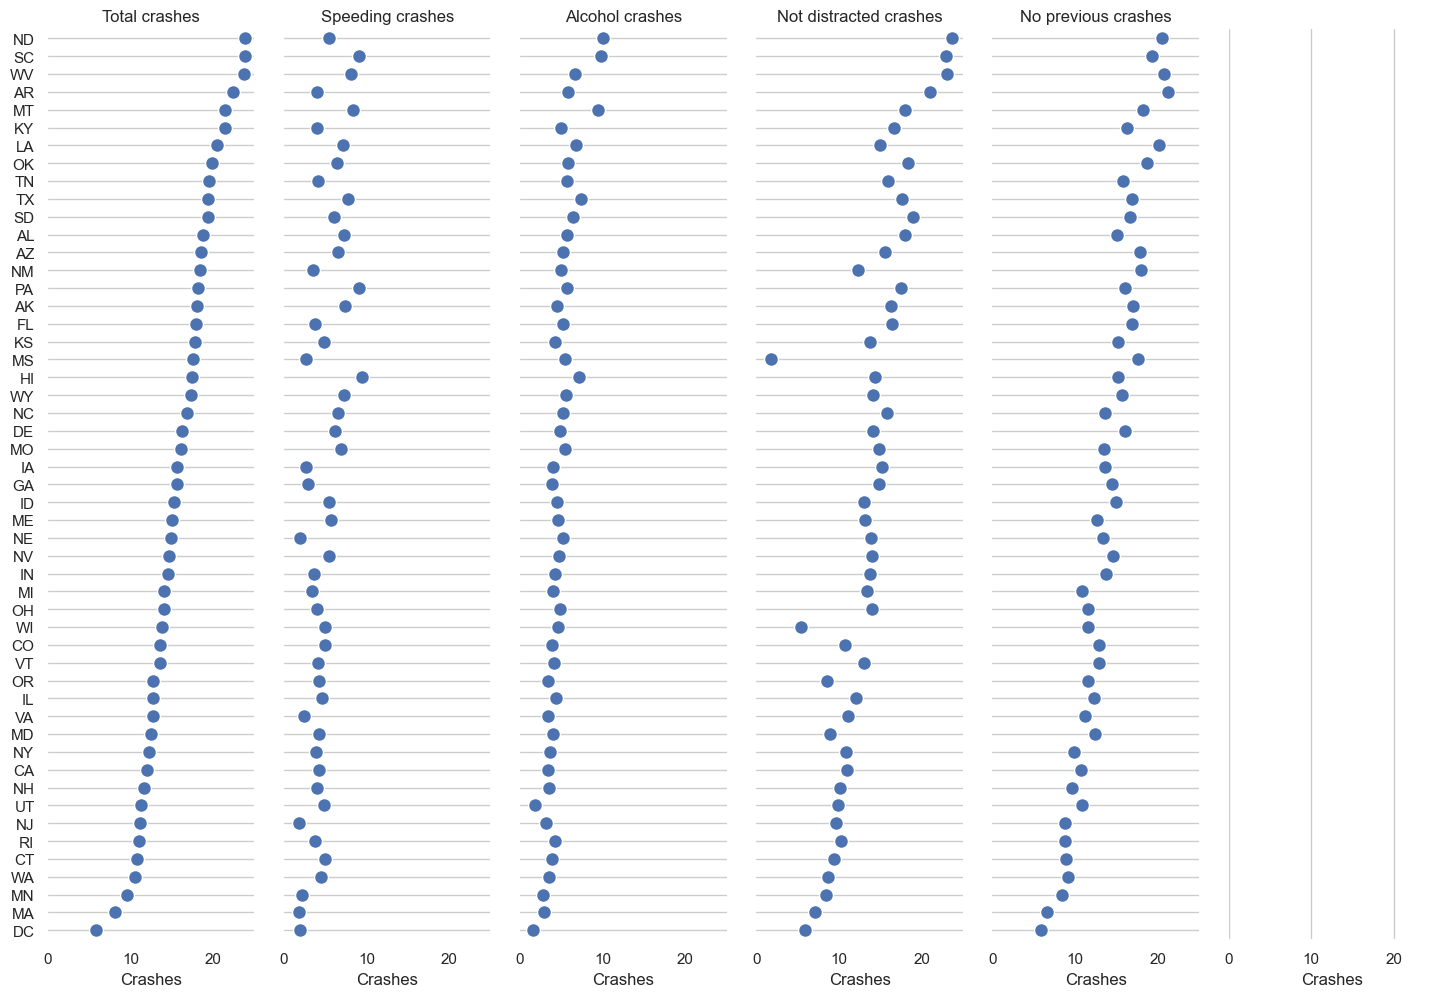

In [34]:
sns.set_theme(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(df.sort_values("total", ascending=False),
                 x_vars=df.columns[:-3], y_vars=["abbrev"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#### Section 7-2: 
1. Goal: Display alcohol related crashes against total crashes for each state
2. Chart-Type: Barplot charts
3. Chart: See below
4. Story: As displayed in the Barplot charts below: With state abbreviations on the y-axis, and each horizontal bar (with dark-blue portion representing alcohol related crashes) displaying total-crashes. Observations:
   * Utah: Had the lowest alcohol-related crashes -- may have something to do with it being a "dry-state" regarding alcohol.
   * The 8 states with the highest number of crashes (per billion miles driven) and highest alcohol related crashes: South Carolina, North Dakota, West Virginia, Arkansas, Kentucky, Montana, Lousiana and Oklohama
   * Surprisingly, the states with lowest number of crashes and alcohol related creashes were: Washington state, Minnesota state, Massachusetts. Why? These are all geographically large states bordering Canada. Possibly some (positive) influence from our northern neighbor, perhaps?

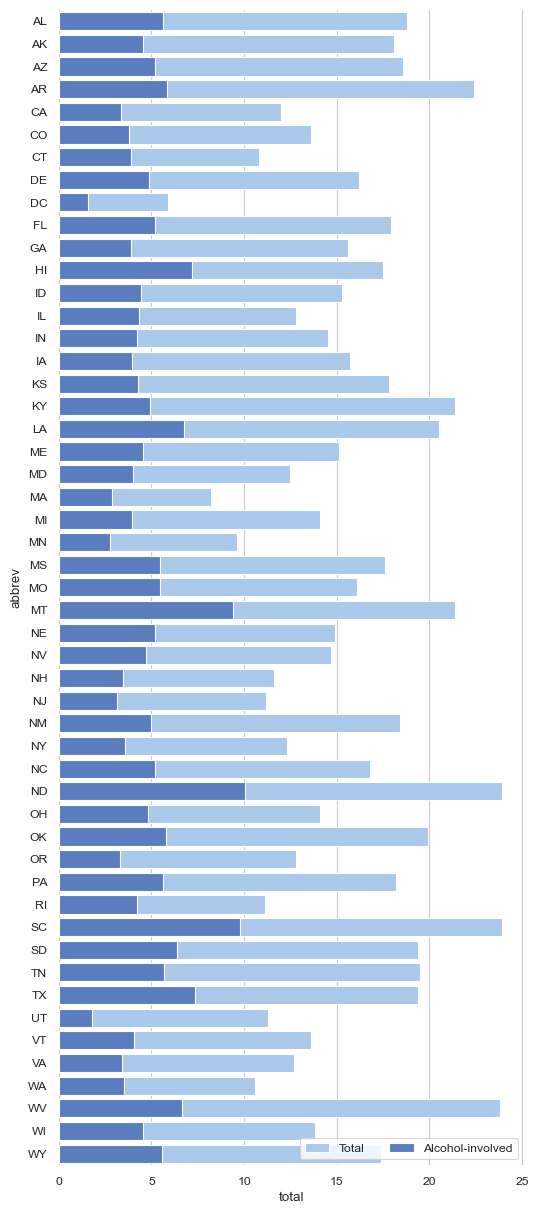

In [35]:
sns.set_context('paper')

df.sort_values('total', ascending = False)
f, ax = plt.subplots(figsize = (6,15))
sns.set_color_codes('pastel')
sns.barplot(x = 'total', y = 'abbrev', data = df,
            label = 'Total', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'alcohol', y = 'abbrev', data = df,
            label = 'Alcohol-involved', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()

#### Section 7-3: 
1. Goal: Comparing total crashes between all 50 states.
2. Chart-Type: Barplot charts.
3. Chart: See below.
4. Story: Similar to 2 previous graphs in section 7-1 and 7-2, 3 states with highest total crashes (per billion miles driven) were: South Carolina, North Dakota and West Virginia. Federal fundings promoting car crashes prevention should be devoted to these 3 states will result in biggest impact in crashes reduction.

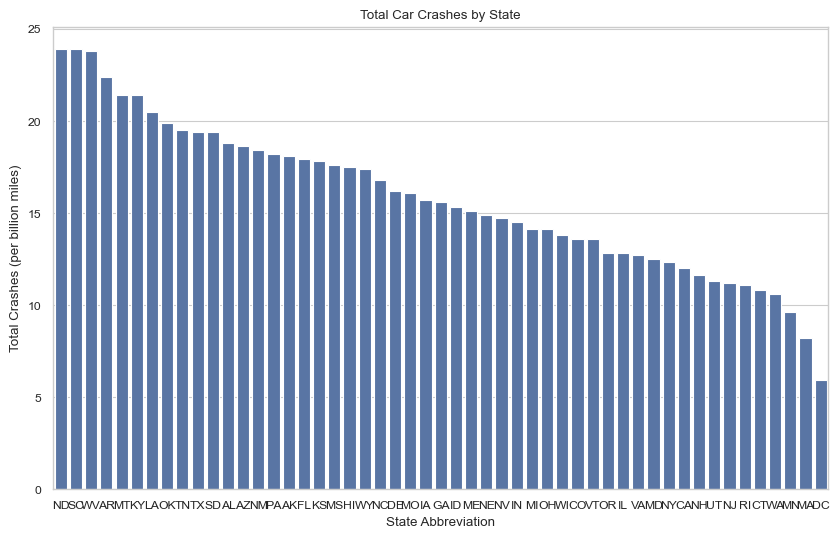

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x="abbrev", y="total", data=df.sort_values("total", ascending=False))
plt.title("Total Car Crashes by State")
plt.xlabel("State Abbreviation")
plt.ylabel("Total Crashes (per billion miles)")
plt.show()

## Section 8. Step-4: Initial Storytelling and Presentation.
#### I researched various options on how to present my stories in ipynb notebook. Google suggested Quarto. After watching some youtube vidoes about Quarto, I decided to utilize it.